# DEFNE YAZICIOGLU 24098

## INDIVIDUAL PROJECT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime
import reverse_geocoder as rg
import warnings

warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [2]:
from os.path import join

In [3]:
d_path = "./data"
filename = "taxi_trips.csv"

df = pd.read_csv(join(d_path, filename))

In [4]:

df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755


In [5]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [6]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

# New columns named ”pickup district” and ”dropoff district”

In [8]:

df["pickup_district"]="" #adding new column
df["dropoff_district"]=""# adding new column
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,,
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,,
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,,
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,,
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,,
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,,
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,,
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,,
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,,
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,,


In [9]:
y1=df.pickup_longitude
x1=df.pickup_latitude
n1=len(x1)
results = rg.search([(x1[i],y1[i]) for i in range (n1)])
dist=results
for i in range (n1):
    dist[i]=dict(results[i])
df["pickup_district"]=[dist[i]["name"] for i in range(n1)] # new column named pickup_district
df

Loading formatted geocoded file...


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,


In [10]:
y2=df.dropoff_longitude
x2=df.dropoff_latitude
n2=len(x2)
results2 = rg.search([(x2[i],y2[i]) for i in range (n2)])
dist2=results2
for i in range (n2):
    dist2[i]=dict(results2[i])
df["dropoff_district"]=[dist2[i]["name"] for i in range(n2)] # new column named dropoff_district
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York


# The top 5 districts where passengers prefer to leave and arrive.

In [11]:
top5scorers1 = df.groupby(by="pickup_district").sum()["passenger_count"].sort_values(ascending=False)[:5]
print(top5scorers1)


pickup_district
Manhattan           75120
New York City       57657
Long Island City    29095
Weehawken           18646
The Bronx            4796
Name: passenger_count, dtype: int64


In [12]:
top5scorers2 = df.groupby(by="dropoff_district").sum()["passenger_count"].sort_values(ascending=False)[:5]
print(top5scorers2)


dropoff_district
Manhattan           73302
New York City       51666
Long Island City    32965
Weehawken           17736
Brooklyn             3403
Name: passenger_count, dtype: int64


# Distance

In [13]:
df["distance"]=""
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,


In [14]:
lst = []
n= len(df)
for i in range (n):
    y1=df['pickup_longitude']
    x1=df['pickup_latitude']
    depart = (y1[i],x1[i])
    y2=df['dropoff_longitude']
    x2=df['dropoff_latitude']
    arrival = (y2[i],x2[i])
    dist =(geodesic(depart,arrival).miles)
    lst.append(dist)
df["distance"] = lst
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1.216161
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,1.037296
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1.119019
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.522780
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,0.530102
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.070960
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.890024
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.144278
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,0.493856
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,2.347975


# New column named ”time of day” by aggregating timestamps


In [15]:
df.groupby('pickup_datetime').size()
arr3=df.pickup_datetime
arr3

0         2016-03-14 17:24:55
1         2016-03-10 21:45:01
2         2016-03-11 07:11:23
3         2016-03-14 14:05:39
4         2016-03-14 15:04:38
5         2016-03-12 20:39:39
6         2016-03-02 20:15:07
7         2016-03-09 13:41:11
8         2016-03-03 22:01:32
9         2016-03-14 04:24:36
10        2016-03-06 10:53:26
11        2016-03-08 02:44:19
12        2016-03-05 10:23:45
13        2016-03-10 18:52:40
14        2016-03-09 17:11:16
15        2016-03-06 11:01:27
16        2016-03-01 06:40:18
17        2016-03-06 17:44:45
18        2016-03-02 07:02:21
19        2016-03-08 08:33:35
20        2016-03-14 14:57:56
21        2016-03-12 13:04:28
22        2016-03-03 17:56:45
23        2016-03-14 20:31:12
24        2016-03-07 19:38:25
25        2016-03-05 02:59:30
26        2016-03-01 08:33:57
27        2016-03-07 18:51:46
28        2016-03-08 10:59:46
29        2016-03-03 10:14:57
                 ...         
118155    2016-03-10 21:43:30
118156    2016-03-10 06:10:29
118157    

In [16]:
df['p_date']=pd.to_datetime(df['pickup_datetime'])
df[5:]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,p_date
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.070960,2016-03-12 20:39:39
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.890024,2016-03-02 20:15:07
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.144278,2016-03-09 13:41:11
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,0.493856,2016-03-03 22:01:32
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,2.347975,2016-03-14 04:24:36
10,id1832737,2,2016-03-06 10:53:26,2016-03-06 10:59:30,1,-73.984711,40.760181,-73.979561,40.752705,N,364,Manhattan,Long Island City,0.384763,2016-03-06 10:53:26
11,id2718231,1,2016-03-08 02:44:19,2016-03-08 03:04:35,1,-73.992500,40.740444,-73.840111,40.719517,N,1216,New York City,Borough of Queens,10.575807,2016-03-08 02:44:19
12,id3956459,2,2016-03-05 10:23:45,2016-03-05 10:45:52,1,-73.986908,40.761608,-74.008408,40.711620,N,1327,Manhattan,New York City,1.771255,2016-03-05 10:23:45
13,id2393811,1,2016-03-10 18:52:40,2016-03-10 19:08:43,1,-73.970581,40.799046,-73.989815,40.767246,N,963,Manhattan,Guttenberg,1.466267,2016-03-10 18:52:40
14,id2808378,1,2016-03-09 17:11:16,2016-03-09 17:28:43,1,-73.978645,40.740932,-74.012695,40.701588,N,1047,Long Island City,New York City,2.478426,2016-03-09 17:11:16


In [17]:
narr=[]
for i in df['p_date']:
    narr.append(i.hour)

df['p_date'][2].hour
df['hour']=narr
df.head(4)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,p_date,hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1.216161,2016-03-14 17:24:55,17
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,1.037296,2016-03-10 21:45:01,21
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1.119019,2016-03-11 07:11:23,7
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.522780,2016-03-14 14:05:39,14


In [18]:
dayarra=[]
for i in narr:
    if(7<= i<=9):
        dayarra.append("rush_hour_morning")
    elif (9<= i <16):
        dayarra.append("afternoon")
    elif (16<=i <18):
        dayarra.append("rush_hour_evening")
    elif (18<=i<23):
        dayarra.append("evening")
    else:
        dayarra.append("late_night")
df['time_of_day']=dayarra

In [19]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,p_date,hour,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1.216161,2016-03-14 17:24:55,17,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,1.037296,2016-03-10 21:45:01,21,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1.119019,2016-03-11 07:11:23,7,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.522780,2016-03-14 14:05:39,14,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,0.530102,2016-03-14 15:04:38,15,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.070960,2016-03-12 20:39:39,20,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.890024,2016-03-02 20:15:07,20,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.144278,2016-03-09 13:41:11,13,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,0.493856,2016-03-03 22:01:32,22,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,2.347975,2016-03-14 04:24:36,4,late_night


# How the average distance varies as time of the day changes

In [20]:
df['distance'].mean()

1.7673351734536742

time_of_day
afternoon            1.687904
evening              1.699616
late_night           2.102824
rush_hour_evening    1.801690
rush_hour_morning    1.606244
Name: distance, dtype: float64


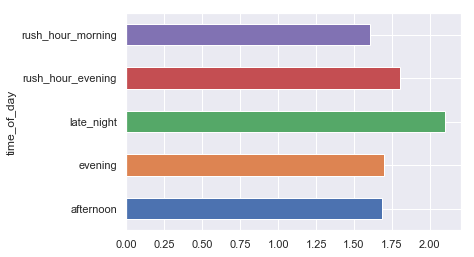

In [21]:
distchange = df.groupby("time_of_day").mean()["distance"]
print(distchange)
distchange.plot(kind="barh")

# How the trip duration varies as time of the day changes

time_of_day
afternoon             965.278183
evening               893.595329
late_night            866.095457
rush_hour_evening    1024.494552
rush_hour_morning     931.361840
Name: trip_duration, dtype: float64


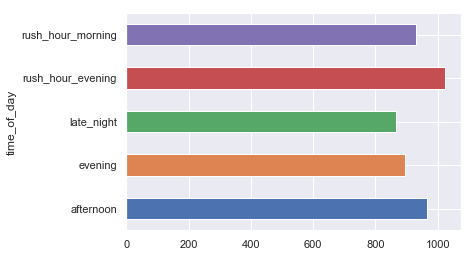

In [22]:
durchange = df.groupby("time_of_day").mean()["trip_duration"]
print(durchange)
durchange.plot(kind="barh")

# HYPOTHESIS TESTING 1

### Does passenger group size affect the distance?

#### Null hypothesis: passenger group size has no effect on the distance.

In [23]:
c1 = df.loc[df['passenger_count'] == 1]
c2 = df.loc[df['passenger_count'] >  1]

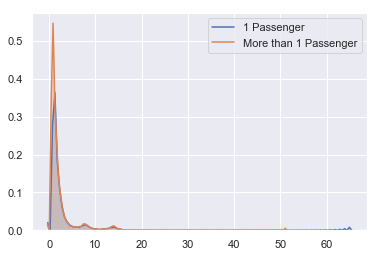

In [24]:
ax = sns.kdeplot(c1["distance"].rename("1 Passenger"), shade=True)
sns.kdeplot(c2["distance"].rename("More than 1 Passenger"), ax=ax, shade=True)

In [25]:
stats.ttest_ind(c1['distance'],c2['distance'], equal_var=False)

Ttest_indResult(statistic=-3.8556642096424634, pvalue=0.00011553484341639668)

# HYPOTHESIS TESTING 2

### Do trip distances increase in weekends?


#### Null hypothesis: The day of the week has no effect on the distance.


In [26]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,hour
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310,1.767335,13.669154
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246,2.578862,6.329418
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000,0.527540,9.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000,0.948208,14.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000,1.756486,19.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000,65.110484,23.000000


In [27]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
dlist = df["pickup_datetime"].dt.weekday
df_c = df.copy()
df_c["day_index"] = [dlist[i] for i in range(0,118185)] 

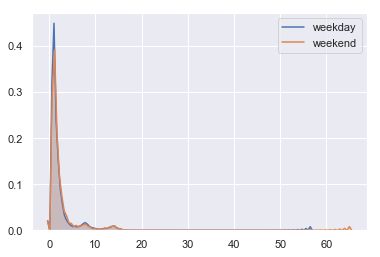

In [28]:
pday = df_c[(df_c["day_index"] < 5) & (df_c["day_index"] >= 0)]
fday = df_c[df_c["day_index"] >=5]

ax = sns.kdeplot(pday["distance"].rename("weekday"), shade=True)
sns.kdeplot(fday["distance"].rename("weekend"), ax=ax, shade=True)

plt.show()

In [29]:
past_values = pday["distance"].values
last_values = fday["distance"].values


_, p_value = stats.ttest_ind(a=past_values, b=last_values, equal_var=False)
p_value

0.10227056869015537